# Epidemic spreading on complex networks





---



*   Lauren Tucker
*   Natalia Sánchez

## Epidemic spreading using the SIS model

Monte Carlo simulation of an epidemic spreading dynamics in complex networks, using the SIS model in which each node represents an individual which can be in two possible states: Susceptible (S), i.e., healthy but can get infected; Infected (I), i.e., has the disease and can spread it to its neighbors.

We are interested in the calculation of the fraction of infected nodes, ρ, in the stationary state, as a function of the infection probability of the disease β (at least 51 values between β=0 and β=1, Δβ=0.02), for different values of the recovery probability μ (e.g. 0.1, 0.5, 0.9). Try different undirected networks (e.g., Erdös-Rényi, scale-free, real), different sizes (at least 500 nodes), average degrees, exponents, etc. Do not make all the combinations, about 10 plots ρ(β) are enough.

Optionally (but mandatory if you want to opt to the maximum grade), compare the ρ(β) result from Monte Carlo simulations with the theoretical prediction provided by the Microscopic Markov Chain Approach (MMCA) model.

**The delivery must include:**

* Source code

* Networks used in Pajek format

* Results files

* Document (in PDF) including:

    * Short explanations on how have you done the required work (software, decisions, etc.)

    * Plots, pointing out “all” the parameters of the corresponding simulation.

Monte Carlo simulations may require a lot of computing time, thus it is recommended the use of compiled languages. In general, and mainly if you are using interpreted languages (e.g., python, Matlab, octave, R), first make tests with small networks, few time steps, and few repetitions, before making the definitive simulations.

Observation: in the original paper on MMCA, the modeled SIS dynamic allows for "one-step reinfections", which are not present in our description of the Monte Carlo simulations. Thus, the last term in Eq. (1) of the paper published in Europhys. Lett. must be removed in order that simulation and theoretical model be comparable. For a comparison of dynamics with and without one-step reinfections, please check the paper published in Int. J. Complex Sys. Sci.

## Libraries and functions

In [ ]:
# Libraries
!pip install scipy==1.8.0
!pip install ndlib
import networkx as nx
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import ndlib.models.ModelConfig as mc
from functions.SISmodel import SISModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def plot_rho_beta(betas, results, mmca=None):
    for row in range(len(results['rho'])):
        plt.plot(betas, results['rho'][row], marker='.', label='µ = '+ str(results['mu'][row]))

    if mmca:
        plt.plot(mmca)
        
    plt.title(str(results['Network'][0])+ ' -  N = '+ str(results['size'][0]) +' -  degree/prob = '+str(results['degree/prob'][0]))
    plt.xlabel('ß')
    plt.ylabel('ρ')
    plt.legend(loc='best')
    plt.show()

## SIS model and Monte Carlo

In the next cell we changed the parameter every time and store the values in a csv to then plot all the results that are shown in the report.

In [ ]:
mus = [0.1, 0.5, 0.9]
betas = np.linspace(0,1,51)
connections_ba = [2,5] # [0.5, 0.7]
nodes_ba = [500, 1000] 

T_max = 1000
T_trans = 900



columns = ['Network', 'size', 'degree/prob', 'mu', 'rho']
results = pd.DataFrame(columns=columns)

# ER mu1 size prob [all point]
for size in nodes_ba:
    for cons in connections_ba:
        g = nx.barabasi_albert_graph(size, cons) # nx.erdos_renyi_graph(size, cons)
        for mu in mus:
            repetitions_averages = []
            for beta in betas:
                # Model Configuration
                model = SISModel(g)
                cfg = mc.Configuration()
                cfg.add_model_parameter('beta', beta) # infection probability
                cfg.add_model_parameter('mu', mu) # μ, recovery probability
                cfg.add_model_parameter("fraction_infected", 0.2) #percentage of nodes infected
                model.set_initial_status(cfg)

                stationary_averages = []
                for i in range(50):
                    iterations = model.iteration_bunch(T_max)
                    stationary_averages.append(np.mean(iterations[T_trans:]))
                repetitions_averages.append(np.mean(stationary_averages))

            results.loc[len(results.index)] = ['BA', size, cons, mu, repetitions_averages] # 'ER'


In [ ]:
results.to_csv('SIS.csv')

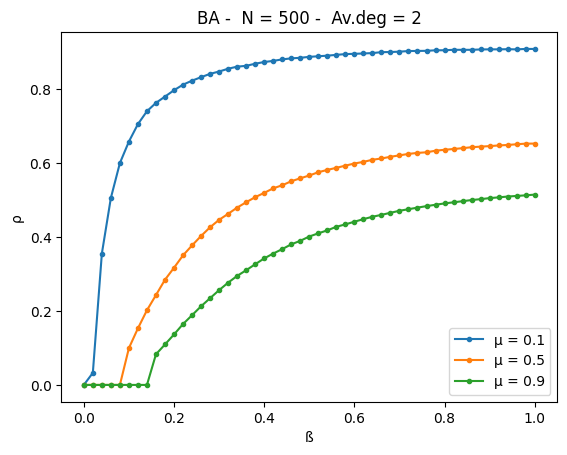

In [ ]:
plot_rho_beta(betas, results)

### Real networks

In [ ]:
dolphins = nx.Graph(nx.read_pajek('/content/dolphins.net'))

mus = [0.1, 0.5, 0.9]
betas = np.linspace(0,1,51)
connections_ba = [2,5]
nodes_ba = [500, 1000]

T_max = 1000
T_trans = 900

columns = ['Network', 'size', 'degree/prob', 'mu', 'rho']
results_dolph = pd.DataFrame(columns=columns)

for mu in mus:
    repetitions_averages = []
    for beta in betas:
        # Model Configuration
        model = SISModel(dolphins)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', beta) # infection probability
        cfg.add_model_parameter('mu', mu) # μ, recovery probability
        cfg.add_model_parameter("fraction_infected", 0.2) #percentage of nodes infected
        model.set_initial_status(cfg)

        stationary_averages = []
        for i in range(50):
            iterations = model.iteration_bunch(T_max)
            stationary_averages.append(np.mean(iterations[T_trans:]))
        repetitions_averages.append(np.mean(stationary_averages))

    results_dolph.loc[len(results_dolph.index)] = ['Dolphins', 62, 5.1, mu, repetitions_averages]

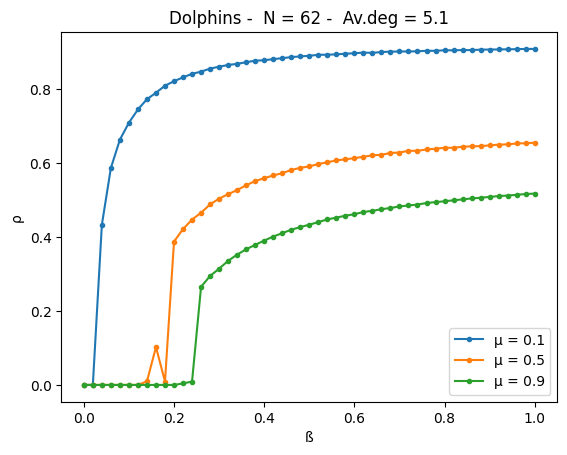

In [ ]:
plot_rho_beta(betas, results_dolph)

In [ ]:
zachary = nx.Graph(nx.read_pajek('/content/zachary_unwh.net'))

mus = [0.1, 0.5, 0.9]
betas = np.linspace(0,1,51)
connections_ba = [2,5]
nodes_ba = [500, 1000]

T_max = 1000
T_trans = 900

columns = ['Network', 'size', 'degree/prob', 'mu', 'rho']
results = pd.DataFrame(columns=columns)

for mu in mus:
    repetitions_averages = []
    for beta in betas:
        # Model Configuration
        model = SISModel(zachary)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', beta) # infection probability
        cfg.add_model_parameter('mu', mu) # μ, recovery probability
        cfg.add_model_parameter("fraction_infected", 0.2) #percentage of nodes infected
        model.set_initial_status(cfg)

        stationary_averages = []
        for i in range(50):
            iterations = model.iteration_bunch(T_max)
            stationary_averages.append(np.mean(iterations[T_trans:]))
        repetitions_averages.append(np.mean(stationary_averages))

    results.loc[len(results.index)] = ['Zachary', 34, 4.5, mu, repetitions_averages]


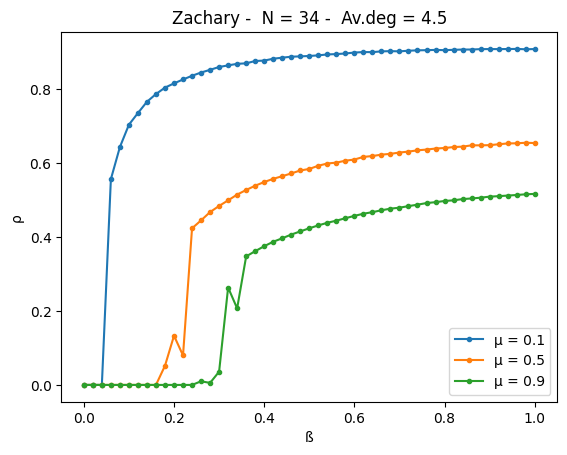

In [ ]:
plot_rho_beta(betas, results)

## MMCA and SIS

In [ ]:
# Define the parameters of the model
N = 100     # number of nodes
mu = 0.5    # probability of spontaneous recovery
beta = 0.2  # infection rate

mus = [0.1, 0.5, 0.9]
betas = np.linspace(0, 1, 51)


# Initialize the values of pi and qi
prev_ps = [0.2] * N  # initial probability of infection for each node
q = (1 - beta * prev_ps[0]) ** N         #for p in initial_ps]
stationary_rho_vals = []
timestep_averages = []

# Define the number of time steps to simulate
num_steps = 1000
for mu in mus:
  repetitions_averages = []
  for beta in betas:
    for x in range(50):
      # Iterate over the time steps and update pi
      for t in range(num_steps):
        updated_ps = []
        for i in range(N):
          # Compute the new value of pi for this node
          new_pi_i = (1 - prev_ps[i]) * (1 - q) + (1 - mu) * prev_ps[i]
          # Add the new value of pi to the list
          updated_ps.append(new_pi_i)

          # Compute the new value of qi for the next iteration / computation of p
          q = 1 - beta * new_pi_i
          for j in range(N):
            q *= (1 - beta * new_pi_i)
        if t >= 900:
          stationary_rho_vals.append(np.mean(updated_ps))
        # Update pi for the next time step
        prev_ps = updated_ps.copy()

      timestep_averages.append(sum(stationary_rho_vals)/10)
    repetitions_averages.append(np.mean(timestep_averages))